In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw08.ok')

Assignment: Homework 8: Confidence Intervals
OK, version v1.12.5



# Homework 8: Confidence Intervals

**Reading**: 
* [Estimation](https://www.inferentialthinking.com/chapters/13/estimation.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 8 is due **Thursday, 4/2 at 11:59pm**. You will receive an early submission bonus point if you turn in your final submission by Wednesday, 4/1 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the [policies](http://data8.org/sp20/policies.html) of this course. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw08.ok')

Assignment: Homework 8: Confidence Intervals
OK, version v1.12.5



## 1. Thai Restaurants


Ben and Frank are trying see what the best Thai restaurant in Berkeley is. They survey 1500 UC Berkeley students selected uniformly at random, and ask each student what Thai restaurant is the best (*Note: this data is fabricated for the purposes of this homework*). The choices of Thai restaurant are Lucky House, Imm Thai, Thai Temple, and Thai Basil. After compiling the results, Ben and Frank release the following percentages from their sample:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Lucky House | 8% |
|Imm Thai | 52% |
|Thai Temple | 25% |
|Thai Basil | 15% |

These percentages represent a uniform random sample of the population of UC Berkeley students. We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each restaurant will receive from the entire population (the entire population is all UC Berkeley students). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of the survey.

In [3]:
# Just run this cell
votes = Table.read_table('votes.csv')
votes

Vote
Imm Thai
Imm Thai
Imm Thai
Imm Thai
Imm Thai
Imm Thai
Imm Thai
Thai Temple
Imm Thai
Imm Thai


**Question 1.** Complete the function `one_resampled_percentage` below. It should return Imm Thai's **percentage** of votes after simulating one bootstrap sample of `tbl`.

**Note:** `tbl` will always be in the same format as `votes`.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [4]:
def one_resampled_percentage(tbl):
    single_sample= tbl.sample()
    return np.count_nonzero(single_sample.column("Vote")=="Imm Thai")/tbl.num_rows*100

one_resampled_percentage(votes)

55.266666666666666

In [5]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Complete the `percentages_in_resamples` function such that it returns an array of 2500 bootstrapped estimates of the percentage of voters who will vote for Imm Thai. You should use the `one_resampled_percentage` function you wrote above.

*Note:* There are no public tests for this question, the autograder cell below will return 0.0% passed. 

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [6]:
def percentages_in_resamples():
    percentage_imm = make_array()
    for i in np.arange(2500):
        single_sample= votes.sample()
        Percentage = np.count_nonzero(single_sample.column("Vote")=="Imm Thai")/votes.num_rows*100
        percentage_imm = np.append(percentage_imm,Percentage)
    return percentage_imm
percentages_in_resamples()

array([51.4       , 51.2       , 51.        , ..., 52.86666667,
       52.2       , 51.13333333])

In [7]:
ok.grade("q1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 0
[k..........] 0.0% passed



In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2,500 bootstrap estimates of the percentage of voters who voted for Imm Thai. Based on what the original Thai restaurant percentages were, does the graph seem reasonable? Talk to a friend or ask a TA if you are unsure!

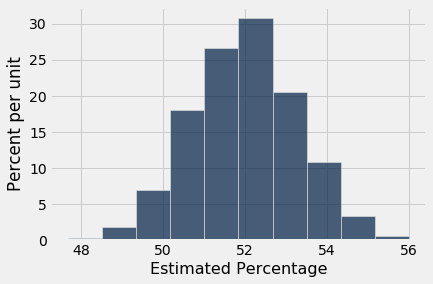

In [8]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

**Question 3.** Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. (Compute the lower and upper ends of the interval, named `imm_lower_bound` and `imm_upper_bound`, respectively.)

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [9]:
imm_lower_bound = percentile(2.5,resampled_percentages)
imm_upper_bound = percentile(97.5,resampled_percentages)
print("Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [{:f}, {:f}]".format(imm_lower_bound, imm_upper_bound))

Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [49.533333, 54.533333]


In [10]:
ok.grade("q1_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** The survey results seem to indicate that Imm Thai is beating all the other Thai restaurants combined among voters. We would like to use confidence intervals to determine a range of likely values for Imm Thai's true lead over all the other restaurants combined. The calculation for Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined is:

$$\text{Imm Thai's % of the vote} - \text{(Lucky House's % of the vote + Thai Temple's % of the vote + Thai Basil's % of the vote)}$$

Define the function `one_resampled_difference` that returns **exactly one value** of Imm Thai's percentage lead over Lucky House, Thai Temple, and Thai Basil combined from one bootstrap sample of `tbl`.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [11]:
def one_resampled_difference(tbl):
    bootstrap = tbl.sample()
    imm_percentage= np.count_nonzero(bootstrap.column("Vote")=="Imm Thai")/votes.num_rows*100
    lh_percentage = np.count_nonzero(bootstrap.column("Vote")=="Lucky House")/votes.num_rows*100
    tt_percentage = np.count_nonzero(bootstrap.column("Vote")=="Thai Temple")/votes.num_rows*100
    tb_percentage = np.count_nonzero(bootstrap.column("Vote")=="Thai Basil")/votes.num_rows*100
    return imm_percentage-(lh_percentage+tt_percentage+tb_percentage)
one_resampled_difference(votes)

4.400000000000006

In [12]:
ok.grade("q1_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.**
Write a function called `leads_in_resamples` that finds 2,500 bootstrapped estimates (the result of calling `one_resampled_difference`) of Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Plot a histogram of the resulting samples. 

**Note:** Imm Thai's lead can be negative.

<!--
BEGIN QUESTION
name: q1_5
manual: true
-->
<!-- EXPORT TO PDF -->

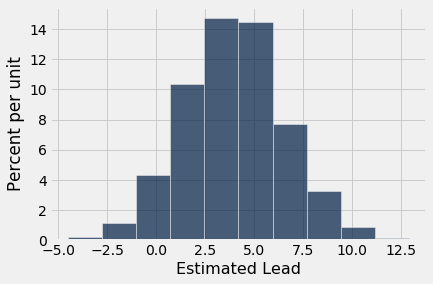

In [15]:
def leads_in_resamples():
    Imma_leads= make_array()
    for i in np.arange(2500):
        one_difference=one_resampled_difference(votes)
        Imma_leads= np.append(Imma_leads,one_difference)
    return Imma_leads

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

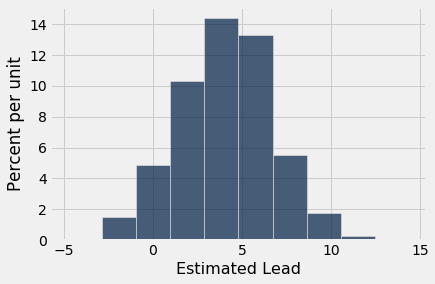

In [14]:
def leads_in_resamples():
    Imma_leads= make_array()
    for i in np.arange(2500):
        bootstrap = votes.sample()
        imm_percentage= np.count_nonzero(bootstrap.column("Vote")=="Imm Thai")/votes.num_rows*100
        lh_percentage = np.count_nonzero(bootstrap.column("Vote")=="Lucky House")/votes.num_rows*100
        tt_percentage = np.count_nonzero(bootstrap.column("Vote")=="Thai Temple")/votes.num_rows*100
        tb_percentage = np.count_nonzero(bootstrap.column("Vote")=="Thai Basil")/votes.num_rows*100
        one_difference= imm_percentage-(lh_percentage+tt_percentage+tb_percentage)
        Imma_leads= np.append(Imma_leads,one_difference)
    return Imma_leads

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

**Question 6.** Use the simulated data from Question 5 to compute an approximate 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined.

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [16]:
diff_lower_bound = percentile(2.5,sampled_leads)
diff_upper_bound = percentile(97.5,sampled_leads)
print("Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [-0.933333, 9.066667]


In [17]:
ok.grade("q1_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Interpreting Confidence Intervals


The staff computed the following 95% confidence interval for the percentage of Imm Thai voters: 

$$[49.40, 54.47]$$

(Your answer may have been a bit different; that doesn't mean it was wrong!)

#### Question 1
Can we say there is a 95% probability that the interval [49.40, 54.47] contains the true percentage of the population that votes for Imm Thai as the best Berkeley Thai restaurant? Answer "yes" or "no" and explain your reasoning. 

*Note:* ambiguous answers using language like "sometimes" or "maybe" will not receive credit.

<!--
BEGIN QUESTION
name: q2_1
manual: true
-->
<!-- EXPORT TO PDF -->

Yes there is 95% probablity that the interval [49.40, 54.47] contains the true percentage of the population that votes for Imm Thai as the best Berkeley Thai restaurant because it is within bootstrap intervals that was done above and the number 49.40 and 54.47 don't seem that far from 52 so yes it is within 95%

**Question 2**

The staff also created 70%, 90%, and 99% confidence intervals from the same sample, but we forgot to label which confidence interval represented which percentages! Match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below (e.g. __ % CI: [49.87, 54.0] $\rightarrow$ replace the blank with one of the three confidence levels). **Then**, explain your thought process and how you came up with your answers.

The intervals are below:

* [49.87, 54.00]
* [50.67, 53.27]
* [48.80, 55.40]

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->
<!-- EXPORT TO PDF -->

70% [50.67, 53.27] because when you subtract 50.67-53.27 the difference is 2.6
90% [49.87, 54.00] because when you subtract 49.87-54.00 the difference is 4.13
99% [48.80, 55.40] because when you subtract 48.80-55.40 the difference is 6.6

My thought process is that since [50.67, 53.27] difference is 2.6 and the [48.80, 55.40] is 6.6, when you have a smaller confidence interval ther number gap between lower bound and upper bound shouldn't be that big and when you have larger confidence interval such as 95% you expect it to have more values in it and its 6.6 which is larger difference and therefore would be the 95% and 70% is [50.67, 53.27].

#### Question 3
Suppose we produced 5,000 new samples (each one a uniform random sample of 1,500 voters/students) from the population and created a 95% confidence interval from each one. Roughly how many of those 5,000 intervals do you expect will actually contain the true percentage of the population?

Assign your answer to `true_percentage_intervals`.

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [18]:
true_percentage_intervals = 5000*.95
true_percentage_intervals

4750.0

In [19]:
ok.grade("q2_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Recall the second bootstrap confidence interval you created, which estimated Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Among
voters in the sample, Imm Thai's lead was 4%. The staff's 95% confidence interval for the true lead (in the population of all voters) was

$$[-0.80, 8.80]$$

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Imm Thai tied with the percentage of votes for Lucky House, Thai Temple, and Thai Basil combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Imm Thai's lead is exactly 0. Our alternative hypothesis is that Imm Thai's lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only the staff's 95% confidence interval.


**Question 4** 

Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `restaurants_tied` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

*Hint:* If you're confused, take a look at [this chapter](https://www.inferentialthinking.com/chapters/13/4/using-confidence-intervals.html) of the textbook.

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [20]:
restaurants_tied = 1

In [21]:
ok.grade("q2_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 5
What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

<!--
BEGIN QUESTION
name: q2_5
manual: false
-->

In [22]:
cutoff_one_percent = 2

In [23]:
ok.grade("q2_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 6
What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

<!--
BEGIN QUESTION
name: q2_6
manual: false
-->

In [24]:
cutoff_ten_percent = 3

In [25]:
ok.grade("q2_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Class Survey


Once you have submitted, please also take the time to complete this class survey! The survey asks about how you’re interacting with class resources now that everything online: we’ll be using the information to adjust lectures, labs, office hours, and more for the rest of the semester.

The class survey is here: https://docs.google.com/forms/d/e/1FAIpQLSeif77zXdNmkEYTpFklQUZC6TxOd5Rd-mMmTQJDKqqwpxngSg/viewform?usp=sf_link

**Question 1.** Fill out the class survey linked above. Right before submitting, a special string will be displayed. Set `special_string` to the special string at the end of the form.

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

In [30]:
special_string = "april fools"

In [31]:
ok.grade("q3_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [32]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw08.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: wajakhan@berkeley.edu

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://okpy.org/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: vmCTvvOoyeFN53l5hD6T15Mh8ANbKi
Successfully logged in as wajakhan@berkeley.edu
Submit... 100% complete
Submission successful for user: wajakhan@berkeley.edu
URL: https://okpy.org/cal/data8/sp20/hw08/submissions/27kjKM



In [33]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 0
[k..........] 0.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tes